In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [274]:
datos = np.loadtxt('datos2.txt')
datos = np.transpose(datos)
# np.random.rand(3)
# np.random.shuffle(datos)
x = datos[:2,:]
y = datos[-1:]

print('Tamaño Datos:', datos.shape)
print('Tamaño X, Y: ', x.shape, y.shape)
print('X', x)
print('Y', y)
# m = len(y)
# limite = int(0.8 * m)
# xTrain, xTest = x[:limite, :], x[limite:, :]
# yTrain, yTest = y[:limite], y[limite:]

# print('xTrain, xTest: ', xTrain.shape, xTest.shape)
# print('yTrain, yTest: ', yTrain.shape, yTest.shape)

# x1 = total[0]
# x2 = total[1]
# y_total = total[-1]
# y = 1 * (y_total == 0)
# y2 = 1 * (y_total == 1)
# y3 = 1 * (y_total == 2)

Tamaño Datos: (3, 3000)
Tamaño X, Y:  (2, 3000) (1, 3000)
X [[4.62220269 4.78285127 3.21942452 ... 4.07868392 3.39337672 2.46823363]
 [3.55204335 0.624113   3.08003634 ... 6.79618137 6.37383542 5.81699103]]
Y [[0. 0. 0. ... 2. 2. 2.]]


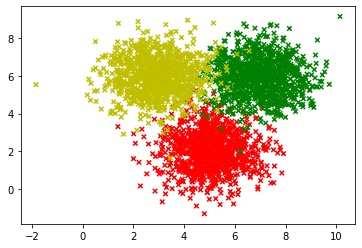

In [140]:
#for i in range(len(y)):
#    if y[i] == 0:
#        c = 'r'
#    else:
#        c = 'g'
#    plt.scatter(x1[i], x2[i], marker='x', s = 20, color = c)
#plt.show()
color = np.where(y_total == 0, 'r', np.where(y_total == 1, 'g', 'y'))
plt.scatter(x1, x2, marker='x', s = 20, c = color)
plt.show()

In [172]:
learning_rate = 0.01
epochs = 500

In [173]:
X1 = tf.constant(x1, dtype = tf.float32)
X2 = tf.constant(x2, dtype = tf.float32)
Y = tf.constant(y, dtype = tf.float32)
Y2 = tf.constant(y2, dtype = tf.float32)
Y3 = tf.constant(y3, dtype = tf.float32)
W = tf.Variable([0.]*3, dtype = tf.float32)

In [174]:
Y.numpy()

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [175]:
def sigmoidal(z):
    return 1/(1 + np.exp(-z))

def modelo(W, X1, X2):
    return tf.sigmoid(W[0] + W[1]*X1 + W[2]*X2)

def costo(W, X1, X2, Y):
    return tf.reduce_mean(-Y*tf.math.log(modelo(W, X1, X2)) - (1 - Y)*tf.math.log(1 - modelo(W, X1, X2)))

def costo_minimizar():
    return tf.reduce_mean(-Y*tf.math.log(modelo(W, X1, X2)) - (1 - Y)*tf.math.log(1 - modelo(W, X1, X2)))

train_op = tf.keras.optimizers.SGD(learning_rate)

In [176]:
hist_error = []
prev_error = 1000
for epoch in range(epochs):
    error = costo(W, X1, X2, Y).numpy()
    hist_error.append(error)
    train_op.minimize(costo_minimizar, var_list = [W])
    # print(prev_error, error)
    if abs(prev_error - error) < 0.0001:
        print(f'Época final: {epoch}')
        break
    prev_error = error
print(f'[W]: {W.numpy()}')

Época final: 496
[W]: [ 0.21590886  0.5306774  -0.9779513 ]


0.23344186


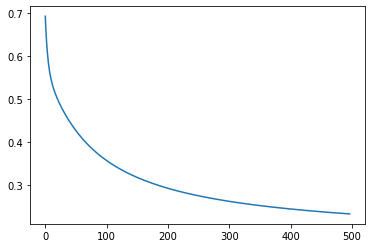

In [177]:
print(error)
plt.plot(hist_error)
plt.show()

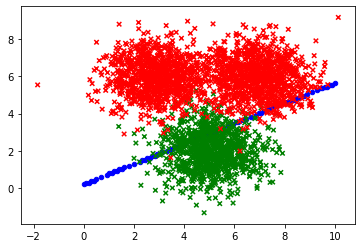

In [178]:
# Graficando las fronteras
x1F, x2F = [], []
for x1P in np.linspace(0, 10, 100):
    for x2P in np.linspace(0, 10, 100):
        yP = sigmoidal(W[0] + W[1]*x1P + W[2]*x2P)
        if (abs(yP - 0.5) < 0.01):
            x1F.append(x1P)
            x2F.append(x2P)
plt.scatter(x1F, x2F, color = 'b', marker = 'o', s = 20)
# for i in range(len(y)):
#     if y[i] == 0:
#         c = 'r'
#     else:
#         c = 'g'
#     plt.scatter(x1[i], x2[i], marker='x', s = 20, color = c)
color = np.where(y == 0, 'r', 'g')
plt.scatter(x1, x2, marker='x', s = 20, color = color)

plt.show()

In [179]:
# Calculando la confianza de clasificación
num_aciertos = 0
for i in range(len(y)):
    y_gorrito = sigmoidal(W[0] + W[1]*x1[i] + W[2]*x2[i])
    if y_gorrito < 0.5:
        clase = 0
    else:
        clase = 1
    if clase == y[i]:
        num_aciertos += 1
print(f'% de Aciertos: {100*num_aciertos/len(y)}')

% de Aciertos: 91.33333333333333


In [180]:
# Producción
# Clasificando algunos valores nuevos
xTest = [[2, 2], [8, 6], [4, 2], [5, 4], [6, 0], [6, 4]]
yTest = []
for i in range(len(xTest)):
    y_gorrito = sigmoidal(W[0] + W[1]*xTest[i][0] + W[2]*xTest[i][1])
    if y_gorrito < 0.5:
        yTest.append(0)
    else:
        yTest.append(1)
print(f'Predicción: {yTest}')

Predicción: [0, 0, 1, 0, 1, 0]
